In [1]:
from multicorner import mcorner
import numpy as np

# Custom Clustering

Ultimately, determining the 'best' set of clusters is somewhat subjective.  Under the hood, multicorner uses essentially a modified version of DBSCAN with adaptive selection of the best eps parameter.  While a good approach, it may not be what is desired in all circumstances.  Here we show that multicorner can also be used with the results of custom-user defined algorithms instead. 

In [2]:
# Parameters
np.random.seed(42)

N = 4  # Number of modes (Gaussian distributions)
M = 3  # Number of dimensions
n_samples_per_mode = 5000
wide_range = 50  # Range for uniform distribution to draw centers (mu)

mu = np.random.uniform(-wide_range, wide_range, size=(N, M))

def random_covariance():
    A = np.random.rand(3, 3)
    cov = np.dot(A, A.T)  # Ensure it's positive semi-definite
    return cov 

In [3]:
covariances = [random_covariance() for _ in range(N)]
data = np.vstack([np.random.multivariate_normal(mean=mu[i], cov=covariances[i], size=n_samples_per_mode) for i in range(N)])

## Approach 1: Default Clustering

We can use multicorner's default behavior to separate the distributions. we recover 4 roughly gaussian posteriors

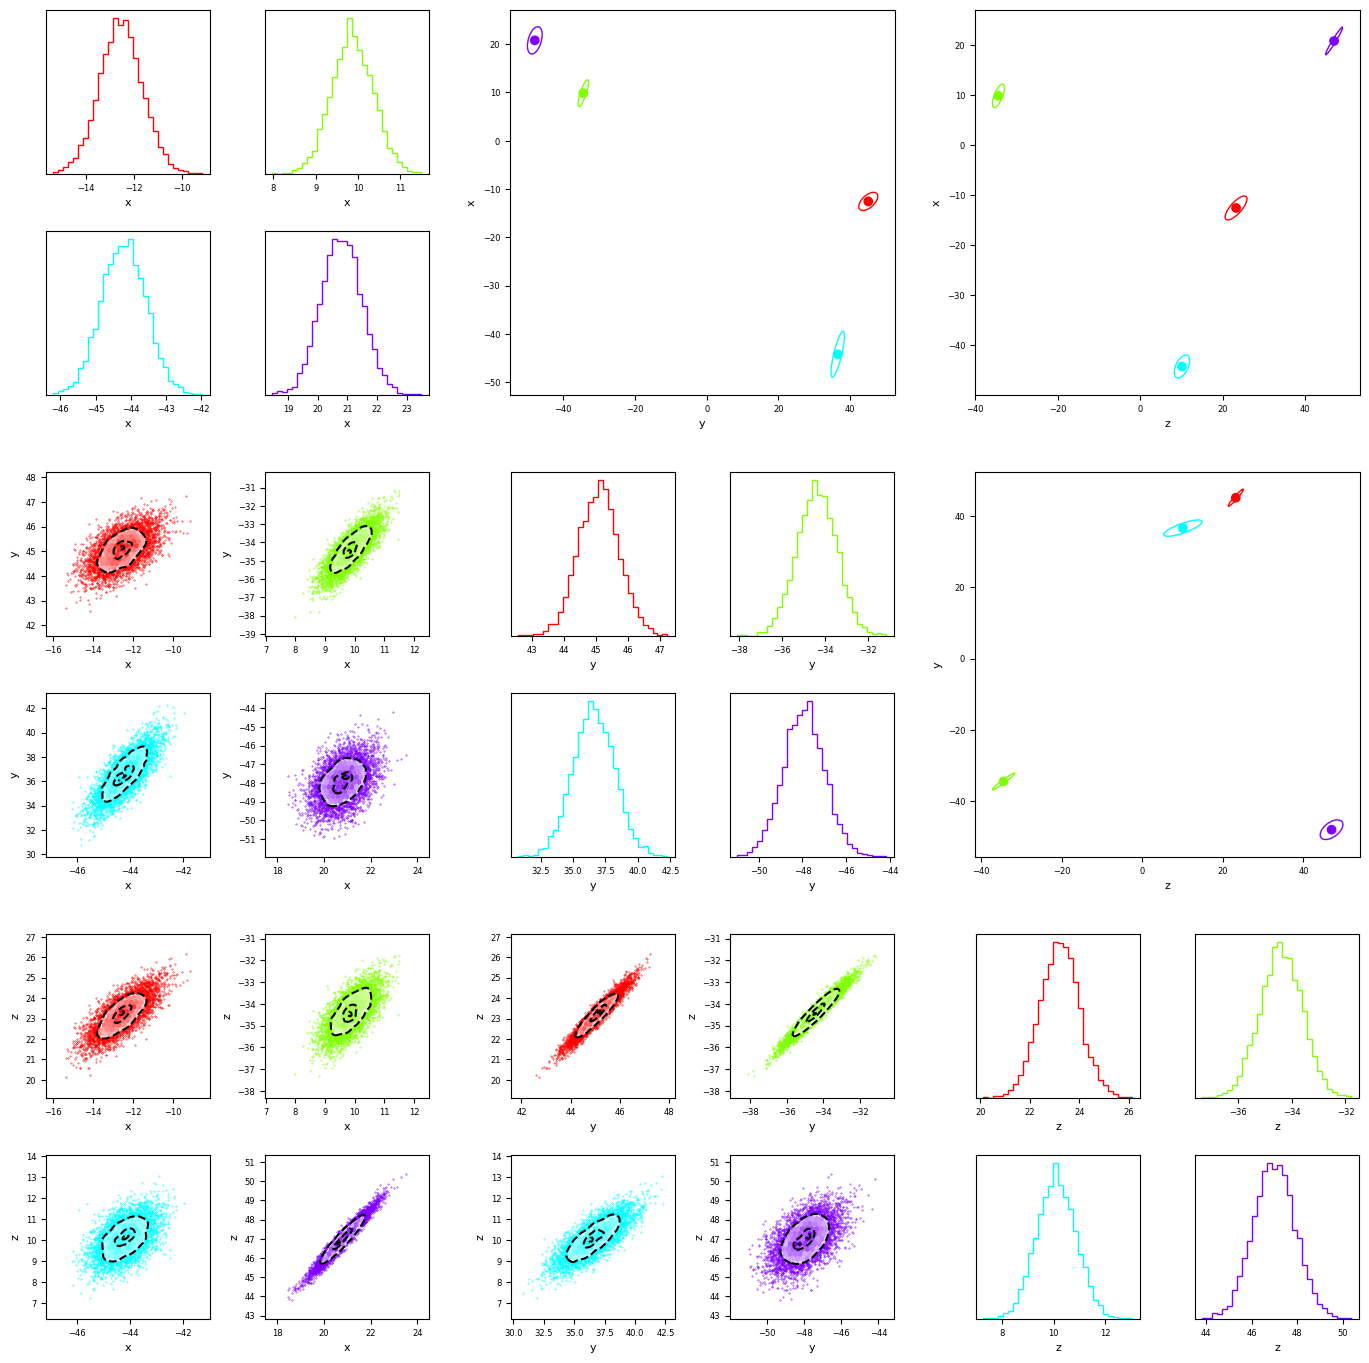

In [4]:
fig = mcorner(data,labels=['x','y','z'],confidence_ellipse=True,nsigma=3)

## Approach 2: Manually set DBScan epsilon. 

We can also set a custom 'epsilon' parameter and pass it to multicorner. In this case we get we get a plot that seems overfit, where some component of the the third gaussian is segmented off and seen as its own cluster.  Without knowing the dataset ahed of time, we might suspect this is the case, by looking at the proximity of green and blue in the orientation plots in the upper triangle. 

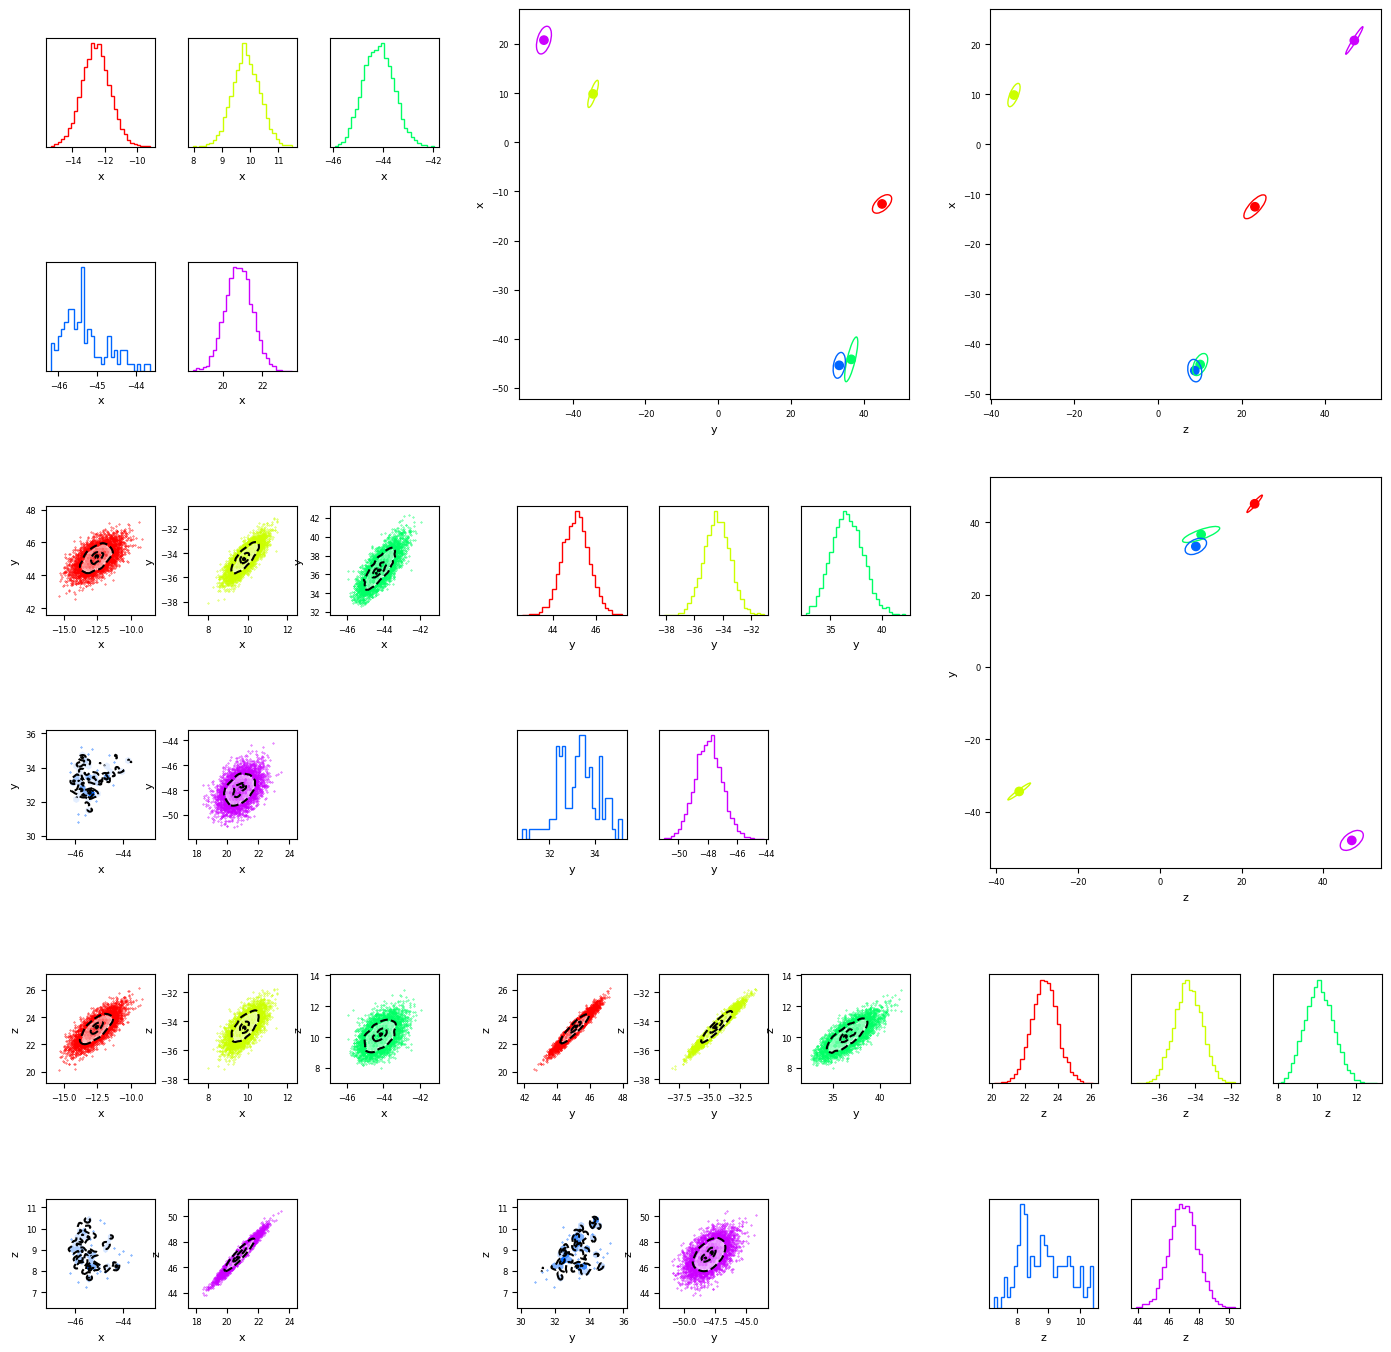

In [5]:
fig = mcorner(data,labels=['x','y','z'],confidence_ellipse=True,nsigma=3,eps=0.3)

## Approach 2: Custom Clustering

We use sklearn's KMeans clustering algorithm to split the into 3 clusters (instead of 4).  By setting autocluster to False, we can plot our custom distribution using multicorner.  This combines two distributions into one.  Again, even if we did not know the distribution ahead of time, we might suspect our clusters are under-fit, it is clear form the plot the bimodality in the lower triangular panel and the correlation in the upper triangle that there are more than 3 clusters.  Knowing this, we might choose to tweak our clustering algorithm!

In [6]:
from sklearn.cluster import KMeans

In [7]:
#we assume 3 clusters
num_clusters = 3 
#fit to the data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_
#produce an array of points for each label
maually_clustered = [data[labels == i] for i in range(num_clusters)]

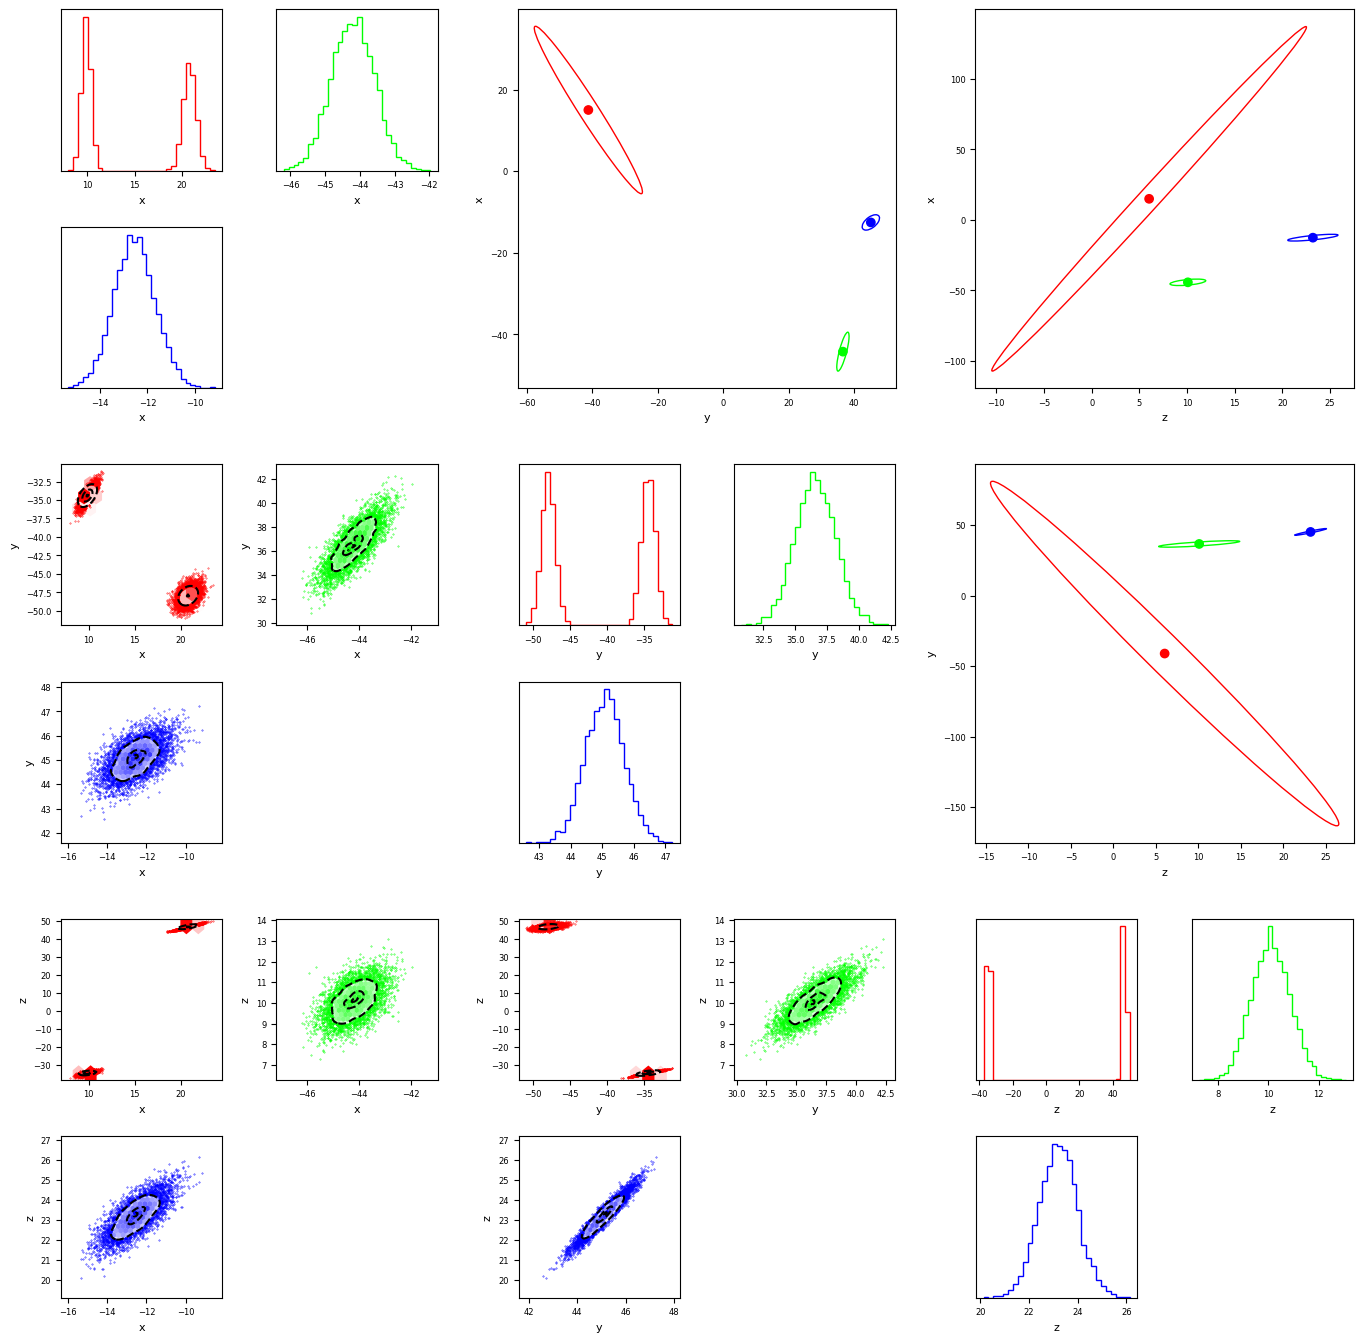

In [8]:
fig = mcorner(maually_clustered,autocluster=False,labels=['x','y','z'],confidence_ellipse=True,nsigma=3)